In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import scipy.sparse as sp

from DataParser import DataParser
from Base.Evaluation.Evaluator import EvaluatorHoldout
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender 
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [2]:
parser = DataParser()
URM_all = parser.get_URM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.85)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

### number of neighbors

In [3]:
MAP_per_k = []
x_tick = []

In [4]:
x_tick_n = [10,20,30,50,100,200,300,500,700,900]
for topK in x_tick_n:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=30, topK=topK)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_dict[10]["MAP"])
    x_tick.append(topK)

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8262.22 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.71 sec. Users per second: 2088
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8716.99 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.73 sec. Users per second: 2076
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8741.42 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.76 sec. Users per second: 2054
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 873

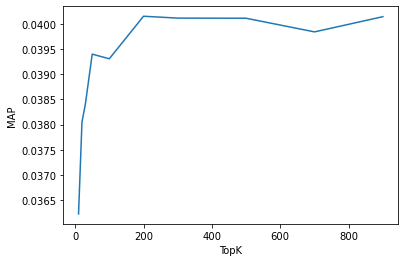

In [5]:
plt.plot(x_tick, MAP_per_k)
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.show()

In [6]:
x_tick = [0, 10, 50, 100, 200,300,400, 500]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=shrink, topK=300)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7949.20 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.06 sec. Users per second: 1852
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8317.98 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.05 sec. Users per second: 1855
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8488.22 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.10 sec. Users per second: 1830
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 843

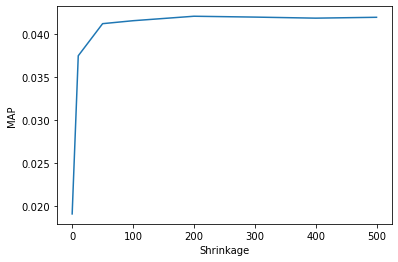

In [8]:
plt.plot(x_tick, MAP_per_shrinkage)
plt.ylabel('MAP')
plt.xlabel('Shrinkage')
plt.show()

In [10]:
similarities = ['cosine', 'jaccard', 'tanimoto', 'dice', 'pearson']
MAP_per_similarity = []

for s in similarities:
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=250, topK=300, similarity=s)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_similarity.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8165.64 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.15 sec. Users per second: 1797
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7551.66 column/sec, elapsed time 0.06 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 4.12 sec. Users per second: 1377
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7274.46 column/sec, elapsed time 0.06 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.65 sec. Users per second: 1553
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 781

In [12]:
MAP_per_similarity

[0.04197941023848327,
 0.04170410551033527,
 0.04170410551033527,
 0.04168512583844297,
 0.00014457333389372224]

In [15]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300)
print('None:')
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7990.44 column/sec, elapsed time 0.05 min
None:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.15 sec. Users per second: 1798
0.04197941023848327


In [14]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300, feature_weighting='TF-IDF')
print('TF-IDF:')
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])

recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300, feature_weighting='BM25')
print('BM25:')    
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])


    

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8103.76 column/sec, elapsed time 0.05 min
TF-IDF:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.12 sec. Users per second: 1816
0.03876708480129644
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7675.92 column/sec, elapsed time 0.06 min
BM25:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.24 sec. Users per second: 1748
0.019846772576835
